In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
crime_sample_df = pd.read_parquet("./data/crime_parquet_columns_of_interest.parquet")
crime_sample_df.head()

,incident_id,property_value,property_description,property_loss_description,crime_against,offense_category,location,criminal_act,age,race_description,sex,relationship
0,187008341.0,124465227.0,Building Materials,"Stolen/Etc. (includes bribed, defrauded, embez...",Property,Larceny/Theft Offenses,Construction Site,None,NS,Not Specified,X,None
1,175335063.0,73455869.0,Clothes/ Furs,"Stolen/Etc. (includes bribed, defrauded, embez...",Property,Burglary/Breaking & Entering,Commercial/Office Building,None,00,Unknown,M,None
2,176448290.0,66000000.0,Other,"Stolen/Etc. (includes bribed, defrauded, embez...",Property,Embezzlement,Hotel/Motel/Etc.,None,NS,Not Specified,X,None
3,180899008.0,54158500.0,Money,Counterfeited/Forged,Property,Counterfeiting/Forgery,Commercial/Office Building,Operating/Promoting/Assisting/Abetting,NS,Not Specified,X,None
4,177001032.0,23647110.0,Collections/ Collectibles,"Stolen/Etc. (includes bribed, defrauded, embez...",Property,Destruction/Damage/Vandalism of Property,Rental Storage Facility,None,50,White,M,None


In [19]:
# exclude "Relationship Unknown" and "Victim Was Stranger" relationships
# and "None/Unknown" offense category
# as they're not informative for the plot.
crime_sample_df = crime_sample_df[crime_sample_df["relationship"] != "Relationship Unknown"]
crime_sample_df = crime_sample_df[crime_sample_df["relationship"] != "Victim Was Stranger"]
crime_sample_df = crime_sample_df[crime_sample_df["offense_category"] != "None/Unknown"]

top_7_offense_category = crime_sample_df["offense_category"].value_counts().nlargest(7).index
crime_sample_df = crime_sample_df[crime_sample_df["offense_category"].isin(top_7_offense_category)]

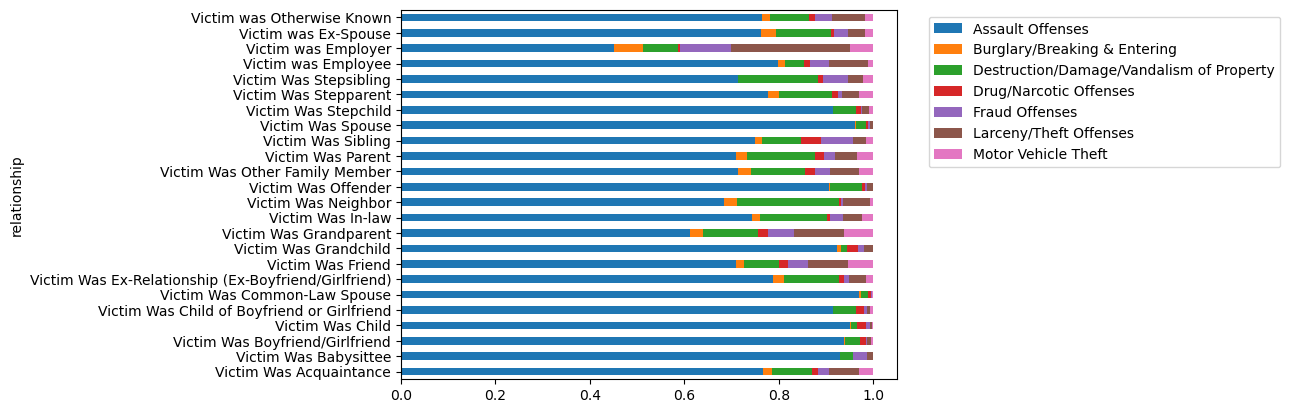

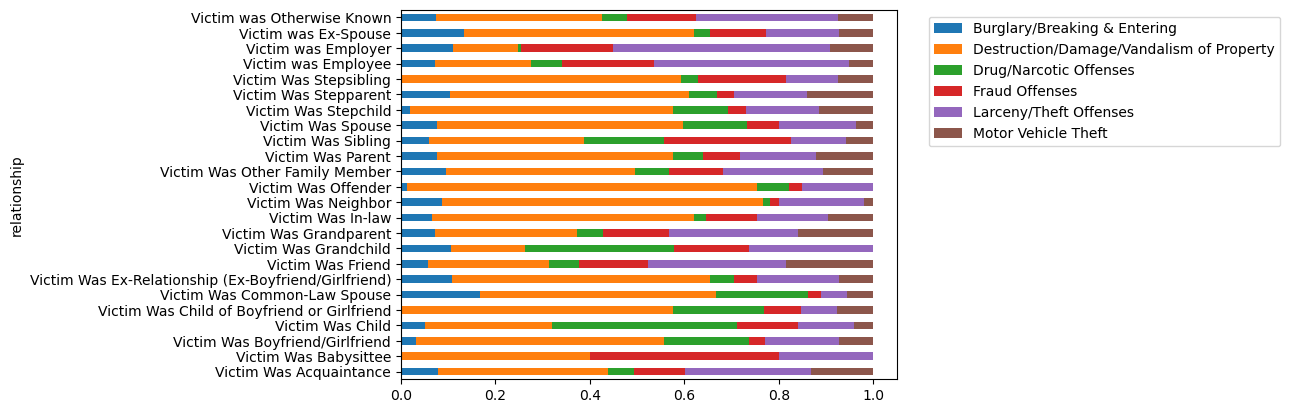

In [20]:
def move_legend_outside_plot(ax):
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

def add_relationship_labels(ax):
    ax.set_title("Proportion of Criminal Acts for each Relationship Type")
    ax.set_xlabel("Proportion")
    ax.set_ylabel("Relationship Type")

fig, ax = plt.subplots()
crime_sample_df.groupby("relationship")["offense_category"].value_counts(normalize=True).unstack().plot(kind="barh", stacked=True, ax=ax)
move_legend_outside_plot(ax)
plt.show()

# Exclude "Assault Offenses" from the plot
crime_sample_df = crime_sample_df[crime_sample_df["offense_category"] != "Assault Offenses"]

fig, ax = plt.subplots()
crime_sample_df.groupby("relationship")["offense_category"].value_counts(normalize=True).unstack().plot(kind="barh", stacked=True, ax=ax)
move_legend_outside_plot(ax)
plt.show()

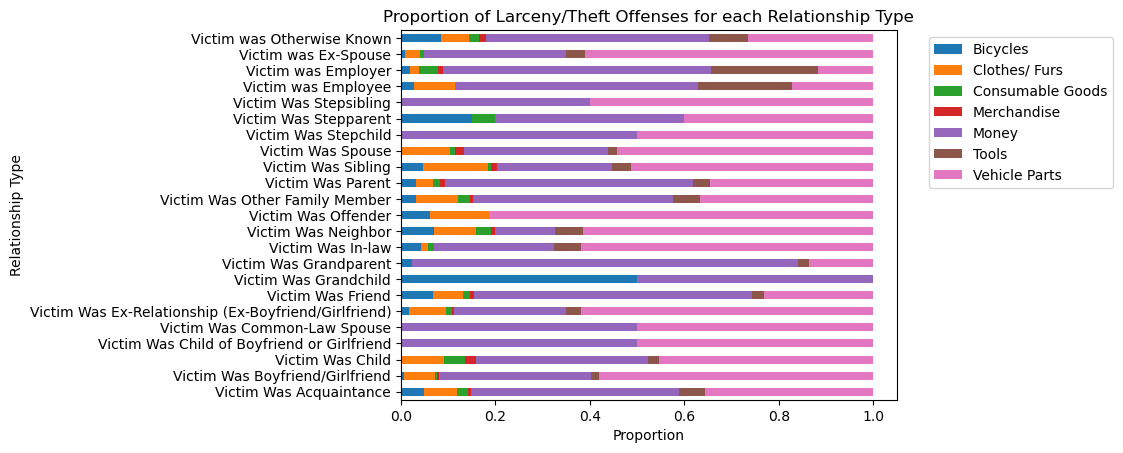

In [22]:
# when offense category is "Larceny/Theft Offenses",
# do similar plot between relationship and "property_description"

# exclude "Other" property description as it's not informative for the plot.
crime_sample_df = crime_sample_df[crime_sample_df["property_description"] != "Other"]
top_7_property_description = crime_sample_df[crime_sample_df["offense_category"] == "Larceny/Theft Offenses"]["property_description"].value_counts().nlargest(7).index

fig, ax = plt.subplots()
crime_sample_df[crime_sample_df["property_description"].isin(top_7_property_description)].groupby("relationship")["property_description"].value_counts(normalize=True).unstack().plot(kind="barh", stacked=True, ax=ax)

move_legend_outside_plot(ax)
ax.set_title("Proportion of Larceny/Theft Offenses for each Relationship Type")
ax.set_xlabel("Proportion")
ax.set_ylabel("Relationship Type")
plt.show()